In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./Train/Train.csv', index_col='ID')
test = pd.read_csv('./Test/Test.csv', index_col='ID')

In [3]:
# list of all the columns
train.columns

Index([u'institute_latitude', u'institute_longitude', u'Var4', u'institute_city', u'institute_state', u'institute_zip', u'Var8', u'institute_country', u'Var10', u'Var11', u'Var12', u'Var13', u'Var14', u'Var15', u'Instructor_Past_Performance', u'Instructor_Association_Industry_Expert', u'project_subject', u'subject_area', u'secondary_subject', u'secondary_area', u'Resource_Category', u'Resource_Sub_Category', u'Var23', u'Var24', u'Similar_Project_Valuation_other_institute', u'Project_Valuation'], dtype='object')

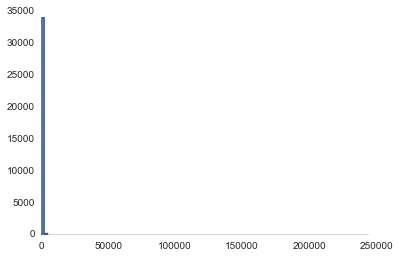

In [5]:
# distribution of target variable
plt.hist(train.Project_Valuation, bins=100);

In [6]:
# highly skewed distribution
train.Project_Valuation.describe()

count     34397.000000
mean        349.989825
std        1451.778640
min           0.000000
25%           0.000000
50%         231.000000
75%         477.000000
max      244778.000000
Name: Project_Valuation, dtype: float64

In [17]:
outliers = train[train.Project_Valuation > 1000]

In [18]:
# lets see the distribution of various variables
outliers.Var4.value_counts()

SA01    310
SA04    299
SA07    298
SA06    294
SA02    288
SA05    279
SA03    258
dtype: int64

In [14]:
train.Var4.value_counts()

SA06    4960
SA03    4952
SA02    4944
SA07    4938
SA05    4883
SA01    4865
SA04    4855
dtype: int64

In [ ]:
# Note: Projects that receive very high valuation have var4 as SA04 

In [19]:
outliers.Instructor_Past_Performance.value_counts()

N    1856
Y     170
dtype: int64

In [20]:
train.Instructor_Past_Performance.value_counts()

N    31444
Y     2953
dtype: int64

In [21]:
outliers.project_subject.value_counts()

Literacy                 435
Literature & Writing     147
Applied Sciences         144
Mathematics              144
Other                    137
Visual Arts              129
Music                    117
Special Needs             88
Performing Arts           82
Environmental Science     75
History & Geography       69
Health & Life Science     68
Social Sciences           59
Sports                    58
Early Development         40
Gym & Fitness             38
Character Education       38
ESL                       30
Health & Wellness         27
College & Career Prep     26
Extracurricular           21
Foreign Languages         15
Civics & Government       15
Parent Involvement        10
Community Service          7
Economics                  4
Nutrition                  3
dtype: int64

In [22]:
train.project_subject.value_counts()

Literacy                 9629
Literature & Writing     3379
Mathematics              3145
Other                    2197
Visual Arts              1907
Special Needs            1704
Applied Sciences         1687
Environmental Science    1186
History & Geography      1161
Health & Life Science    1045
Music                    1018
Early Development         969
Social Sciences           940
ESL                       739
Character Education       618
Performing Arts           583
Gym & Fitness             524
Extracurricular           326
Sports                    318
Health & Wellness         299
Foreign Languages         239
College & Career Prep     238
Parent Involvement        180
Civics & Government       150
Community Service         124
Nutrition                  50
Economics                  42
dtype: int64

In [23]:
outliers.subject_area.value_counts()

Literacy & Language    627
Math & Science         431
Music & The Arts       328
Applied Learning       279
History & Civics       147
Health & Sports        126
Special Needs           88
dtype: int64

In [24]:
train.subject_area.value_counts()

Literacy & Language    13986
Math & Science          7063
Applied Learning        4652
Music & The Arts        3508
History & Civics        2293
Special Needs           1704
Health & Sports         1191
dtype: int64

In [27]:
outliers.Instructor_Association_Industry_Expert.value_counts()

N    1889
Y     137
dtype: int64

In [28]:
train.Instructor_Association_Industry_Expert.value_counts()

N    32581
Y     1816
dtype: int64

In [29]:
outliers.Resource_Category.value_counts()

Technology    769
Supplies      550
Books         344
Trips         182
Other         150
Visitors       31
dtype: int64

In [31]:
train.Resource_Category.value_counts()

Supplies      13666
Technology     8355
Books          7881
Other          2894
Trips          1354
Visitors        247
dtype: int64

In [30]:
outliers.Resource_Sub_Category.value_counts()

E41     281
N131    273
F51     269
M121    261
O141    235
I81     125
H71     117
G61     102
Q161     70
P151     60
J91      54
R171     52
L111     49
K101     47
U201     13
T191     10
S181      8
dtype: int64

In [32]:
train.Resource_Sub_Category.value_counts()

F51     6847
E41     6819
M121    2821
N131    2778
O141    2756
H71     2649
I81     2619
G61     2613
J91     1006
K101     948
L111     940
Q161     481
R171     437
P151     436
U201      89
T191      89
S181      69
dtype: int64

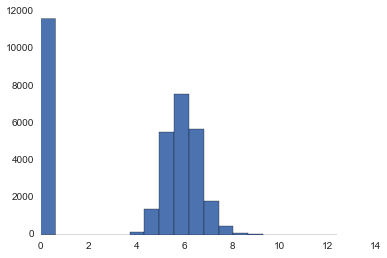

In [34]:
plt.hist(np.log1p(train.Project_Valuation), bins=20);

In [35]:
predictions_100 = pd.read_csv('./submissions/gbr_1000.csv')

In [36]:
predictions_100.columns

Index([u'ID', u'Project_Valuation'], dtype='object')

In [37]:
def f(z):
    if z < 0:
        return 0
    else:
        return z
    
predictions_100['Project_Valuation'] = predictions_100.Project_Valuation.map(f)

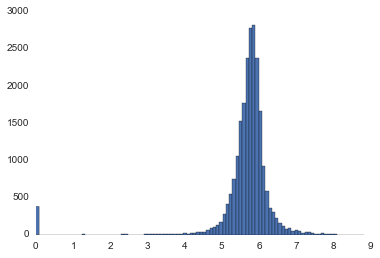

In [39]:
plt.hist(np.log1p(predictions_100.Project_Valuation), bins=100);

In [41]:
predictions_100.to_csv('./submissions/gbr_1000_modified.csv', index=False)

In [46]:
train.columns[:-1]

Index([u'institute_latitude', u'institute_longitude', u'Var4', u'institute_city', u'institute_state', u'institute_zip', u'Var8', u'institute_country', u'Var10', u'Var11', u'Var12', u'Var13', u'Var14', u'Var15', u'Instructor_Past_Performance', u'Instructor_Association_Industry_Expert', u'project_subject', u'subject_area', u'secondary_subject', u'secondary_area', u'Resource_Category', u'Resource_Sub_Category', u'Var23', u'Var24', u'Similar_Project_Valuation_other_institute'], dtype='object')

In [48]:
train.columns[[4 ,7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 23]]

Index([u'institute_state', u'institute_country', u'Var10', u'Var11', u'Var12', u'Var13', u'Var14', u'Var15', u'Instructor_Past_Performance', u'Instructor_Association_Industry_Expert', u'secondary_area', u'Var24'], dtype='object')

In [50]:
train.Resource_Category.value_counts()

Supplies      13666
Technology     8355
Books          7881
Other          2894
Trips          1354
Visitors        247
dtype: int64